* Gregory Burns
* Personal Loan Project
* Completed 5.28.2025

## **Problem Statement**

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## **1. Importing Libraries**

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to build logistics regression model
from sklearn.linear_model import LogisticRegression

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## **2. Loading Dataset**

**Creating a function to locally load the data file**

In [ ]:
# function to return data frame after opening file dialog to prompt for a filename in google colab
def upload_df():
    # let colab access my files
    from google.colab import files

    # Upload the file
    uploaded = files.upload()

    # Get the filename
    filename = list(uploaded.keys())[0]

    # Importing and Reading a data set
    return_df = pd.read_csv(filename)

    # return the dataframe
    return return_df

**Loading the data file**

In [ ]:
loan_modeling = upload_df() # Uploading Loan_Modeling.csv

Saving Loan_Modelling.csv to Loan_Modelling.csv


**Creating a copy of the data file**

In [ ]:
df = loan_modeling.copy()

## **3. Data Overview and Cleanup**

### **3A. Data Overview**

**Checking the head and tail of the data**

In [ ]:
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


**Checking the shape of the data**

In [ ]:
df.shape

(5000, 14)

**Observations**
* We have 5000 rows and 14 columns

**Checking data attributes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Obversations**
* The ID field isn't going to be useful for this analysis.
* Age, experience, income, family, ccavg, and mortgage are legit numerical variables.
* Zip code shows as integer, though clearly this categorical. I'll do analysis to check for usefulness.
* Education is encoded categorical data. I'm going to presume it's ordinal, as generally one has undergrad if they have graduate, and graduate if they have advanced/professional.
* Though showing as integers, the last five columns are categorical.

**Checking the statistics of the data**

In [ ]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Obversations**
* Average age is ~45 years
* Average years of experience is ~20
* Income ranges from 8K to 224K, average ~74K
* Average credit card spend is ~1.9K
* Average mortgage is ~56
* Min of experience is negative. As this doesn't make much logical sense, I'll analyze further.

### **3B. Data Cleanup**

**I don't like the negative experience values.Taking a closer look.**

In [ ]:
# Identify rows with negative experience
neg_exp_rows = df[df['Experience'] < 0]

# Count the number of negative experience values
count_neg_exp = len(neg_exp_rows)

# Range of negative experience
min_neg_exp = neg_exp_rows['Experience'].min()
max_neg_exp = neg_exp_rows['Experience'].max()

print(f"Rows with negative experience: {count_neg_exp}")
print(f"Range of negative experience: {min_neg_exp} to {max_neg_exp}")

Rows with negative experience: 52
Range of negative experience: -3 to -1


**Observations**
* About 1% of rows show negative experience.
* If it was only a few, I'd presume a typo. This isn't the case.
* Data dictionary doesn't define negative experience.
* This ranges from -3 to -1.
* This makes no logical sense to me. For cleaner data, I will change all negative values to zero.

**Updating negative experience rows**

In [ ]:
df.loc[df['Experience'] < 0, 'Experience'] = 0 # Updating negatives to zero

**Rechecking statistics**

In [ ]:
df.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Observations**
* Problem solved. Experience min now shows as zero.

**Checking for null values**

In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


**Observations**
* We have no missing values.

**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Observations**
* We have no duplicate values

**Dropping the ID field, as we won't need this.**

In [ ]:
df = df.drop('ID', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**Next, I want to do a quick analysis of zip code to make sure it won't be especially useful for this analysis.**

In [ ]:
# Display counts by zip codes
zip_counts = df['ZIPCode'].value_counts()
zip_counts

,count
ZIPCode,
94720,169
94305,127
95616,116
90095,71
93106,57
...,...
94970,1
90068,1
90813,1


In [ ]:
# How many zip codes are under 11 customers
zips_under_11 = zip_counts[zip_counts < 11]
count_zip_under_11 = len(zips_under_11)
print(f"Number of zip codes with less than 11 customers: {count_zip_under_11}")

Number of zip codes with less than 11 customers: 335


**Observations**
* There are 467 different zip codes.
* 335 have 10 or fewer customers.
* In some advanced algorithm, perhaps zip code matters.
* For this project, though, I'm dropping zip code.

**Dropping zip code**

In [ ]:
df = df.drop('ZIPCode', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


**Summary**
* No duplicates or nulls
* Fixed negative experience values
* Dropped ID and ZIPCode
* Data ready for analysis

## **4. Exploratory Data Analysis**

### **4A. Univariate Analysis**

**Creating histograms for numeric values**

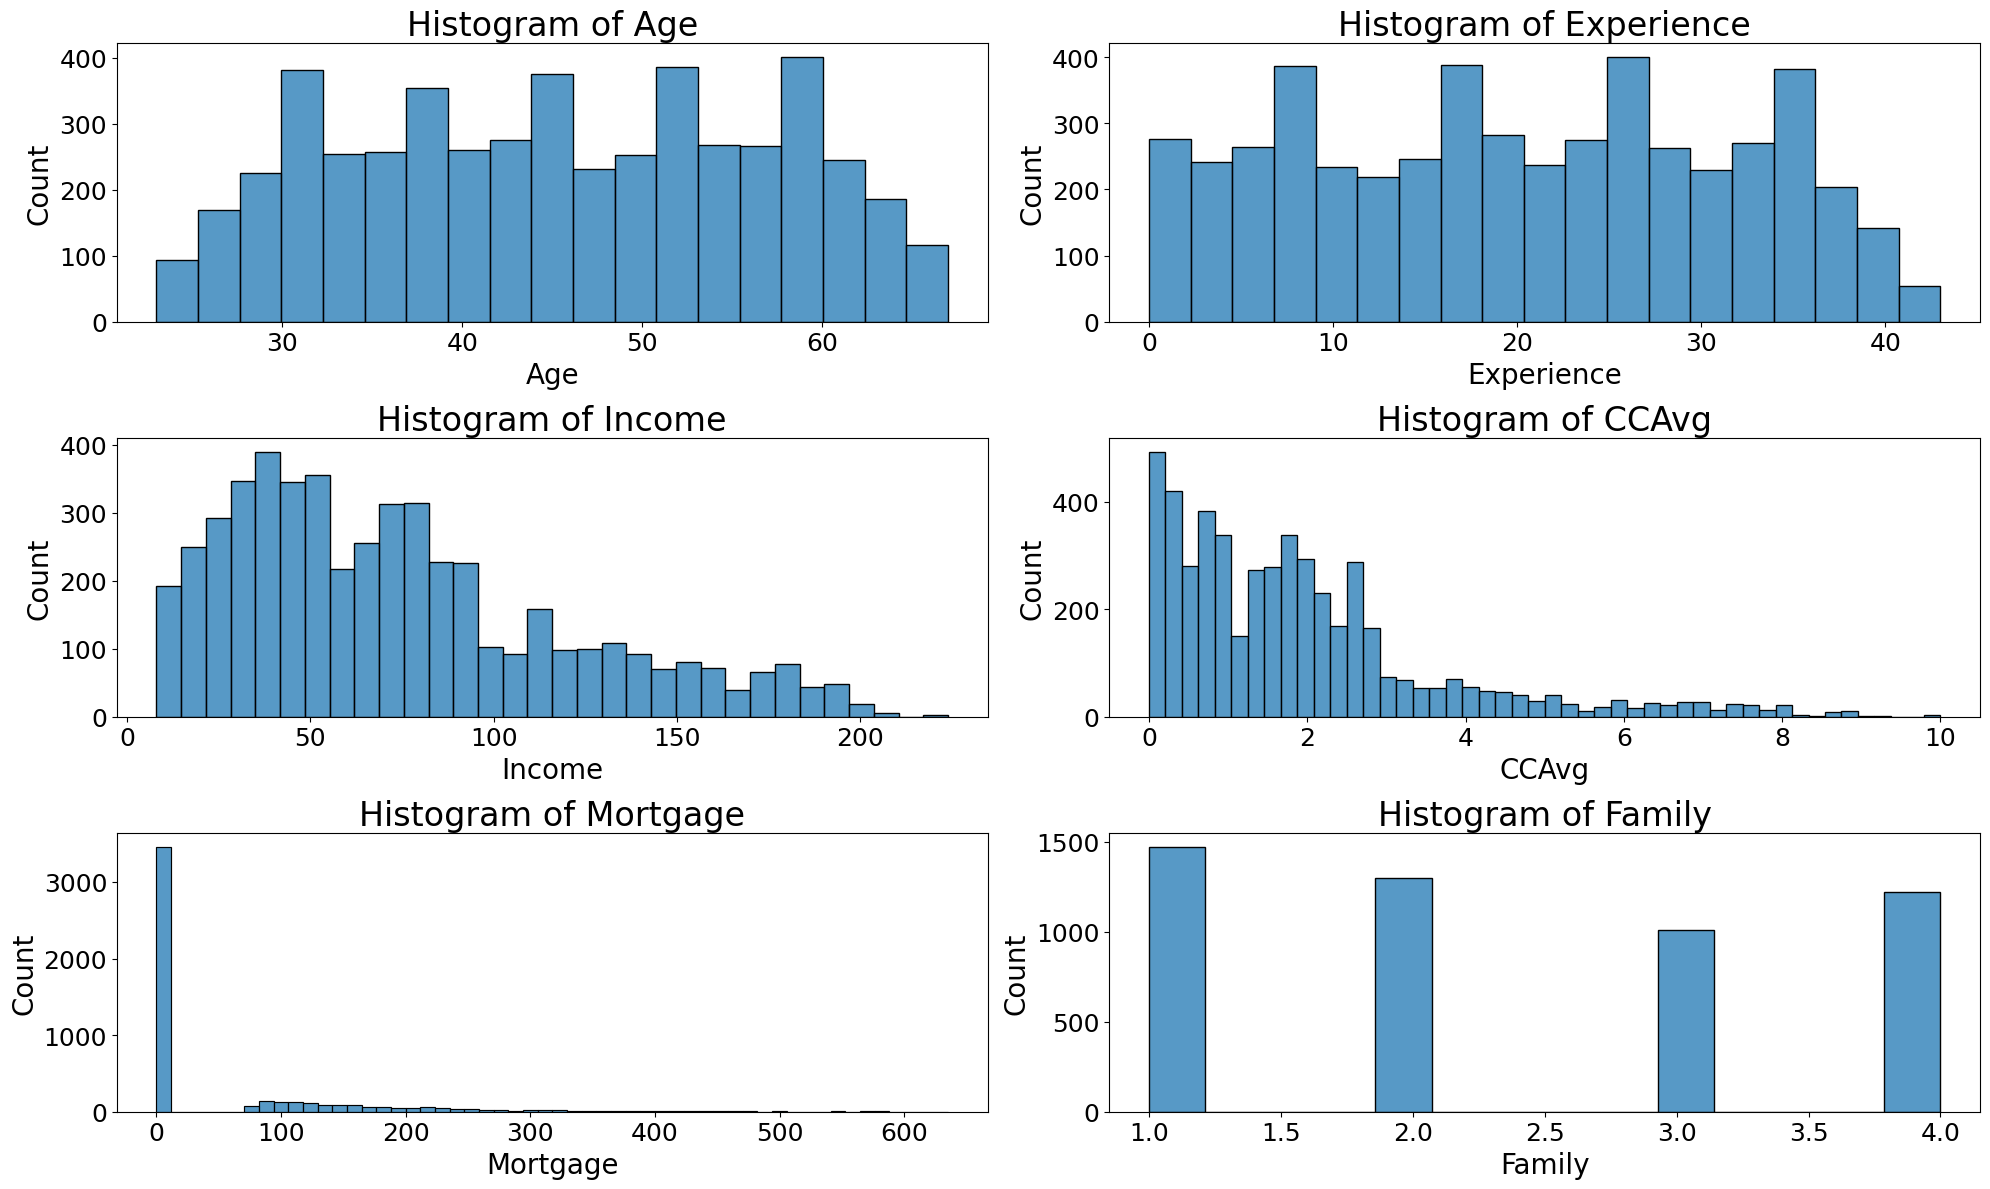

In [ ]:
# Numeric columns to plot
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Family']

# Figure and array of subplots
fig, subs = plt.subplots(3, 2, figsize=(20, 12))
subs = subs.flatten() # Flatten subplot array

# Create histogram for each numeric field
for i, col_name in enumerate(num_cols):
  sub = subs[i]
  sns.histplot(data=df, x=col_name, ax=sub, kde=False)
  sub.set_xlabel(col_name, fontsize=20)
  sub.set_ylabel('Count', fontsize=20)
  sub.tick_params(axis='x', labelsize=18)
  sub.tick_params(axis='y', labelsize=18)
  sub.set_title(f'Histogram of {col_name}', fontsize=24)

# Display all subplots
plt.tight_layout()
plt.show()

**Observations**
* Age, Experience, and Family are fairly evenly distributed.
* CCAvg, Mortgage, and income are all right skewed.
* There are a very high percentage of clients without a mortgage, implying there should be a lot of outliers.

**Creating boxplots for numeric values**

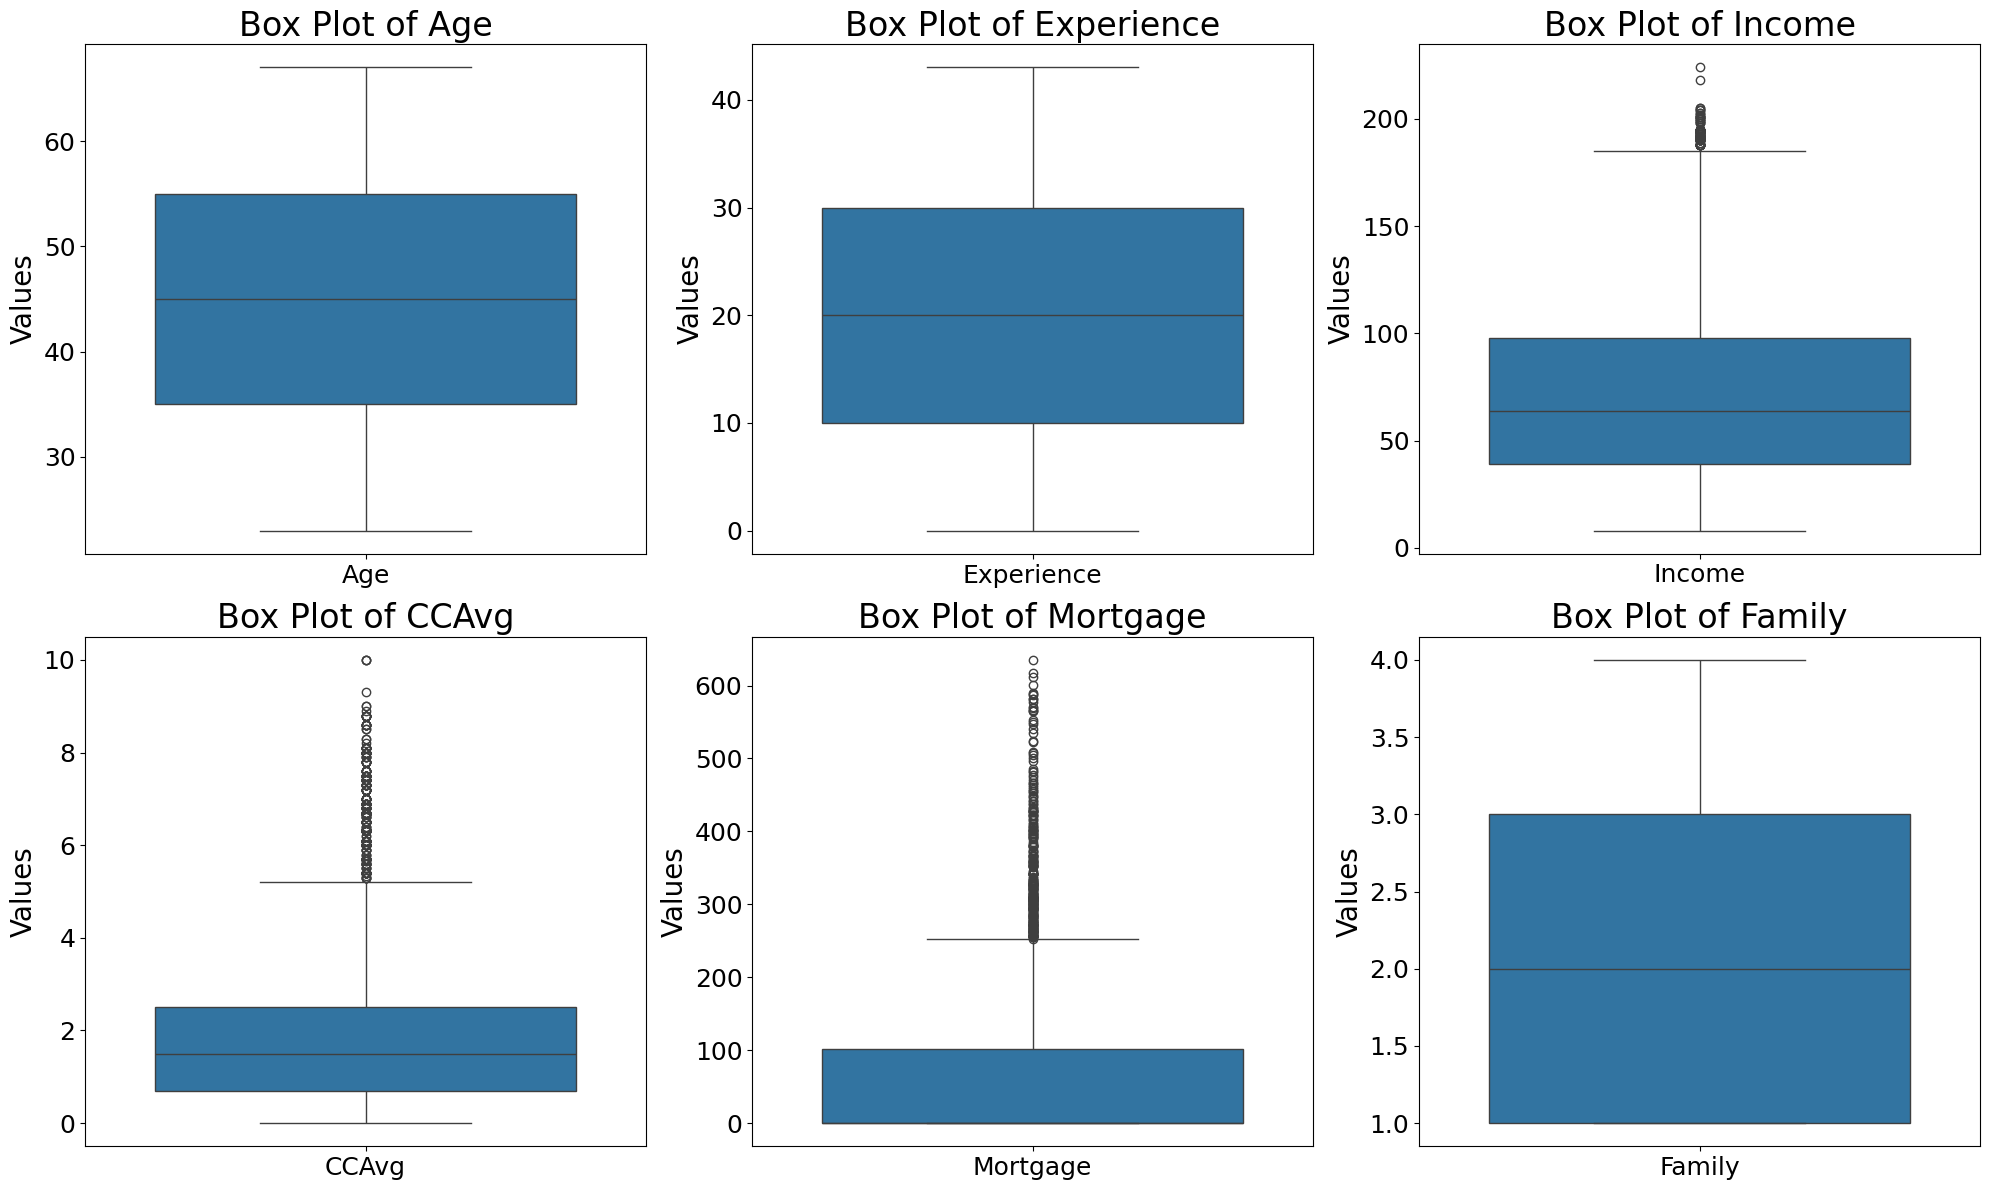

In [ ]:
# Figure and array of subplots
fig, subs = plt.subplots(2, 3, figsize=(20, 12))
subs = subs.flatten() # Flatten subplot array

# Create box plot for each numeric field
for i, col_name in enumerate(num_cols):
  sub = subs[i]
  sns.boxplot(data=df[[col_name]], ax=sub, width=0.75)
  sub.set_ylabel('Values', fontsize=20)
  sub.set_xlabel('', fontsize=20)
  sub.tick_params(axis='x', labelsize=18, rotation=0)
  sub.tick_params(axis='y', labelsize=18)
  sub.set_title(f'Box Plot of {col_name}', fontsize=24)

# Display all subplots
plt.tight_layout()
plt.show()

**Observations**
* As expected, Mortgage has a large number of outliers.
* Income and CCAvg also have a fair number of outliers.
* As expected, Age, Experience, and Family are fairly evenly distributed.
* At this point, I see no reason to do anything with the outliers.

**Creating count plots for categorical variables.**

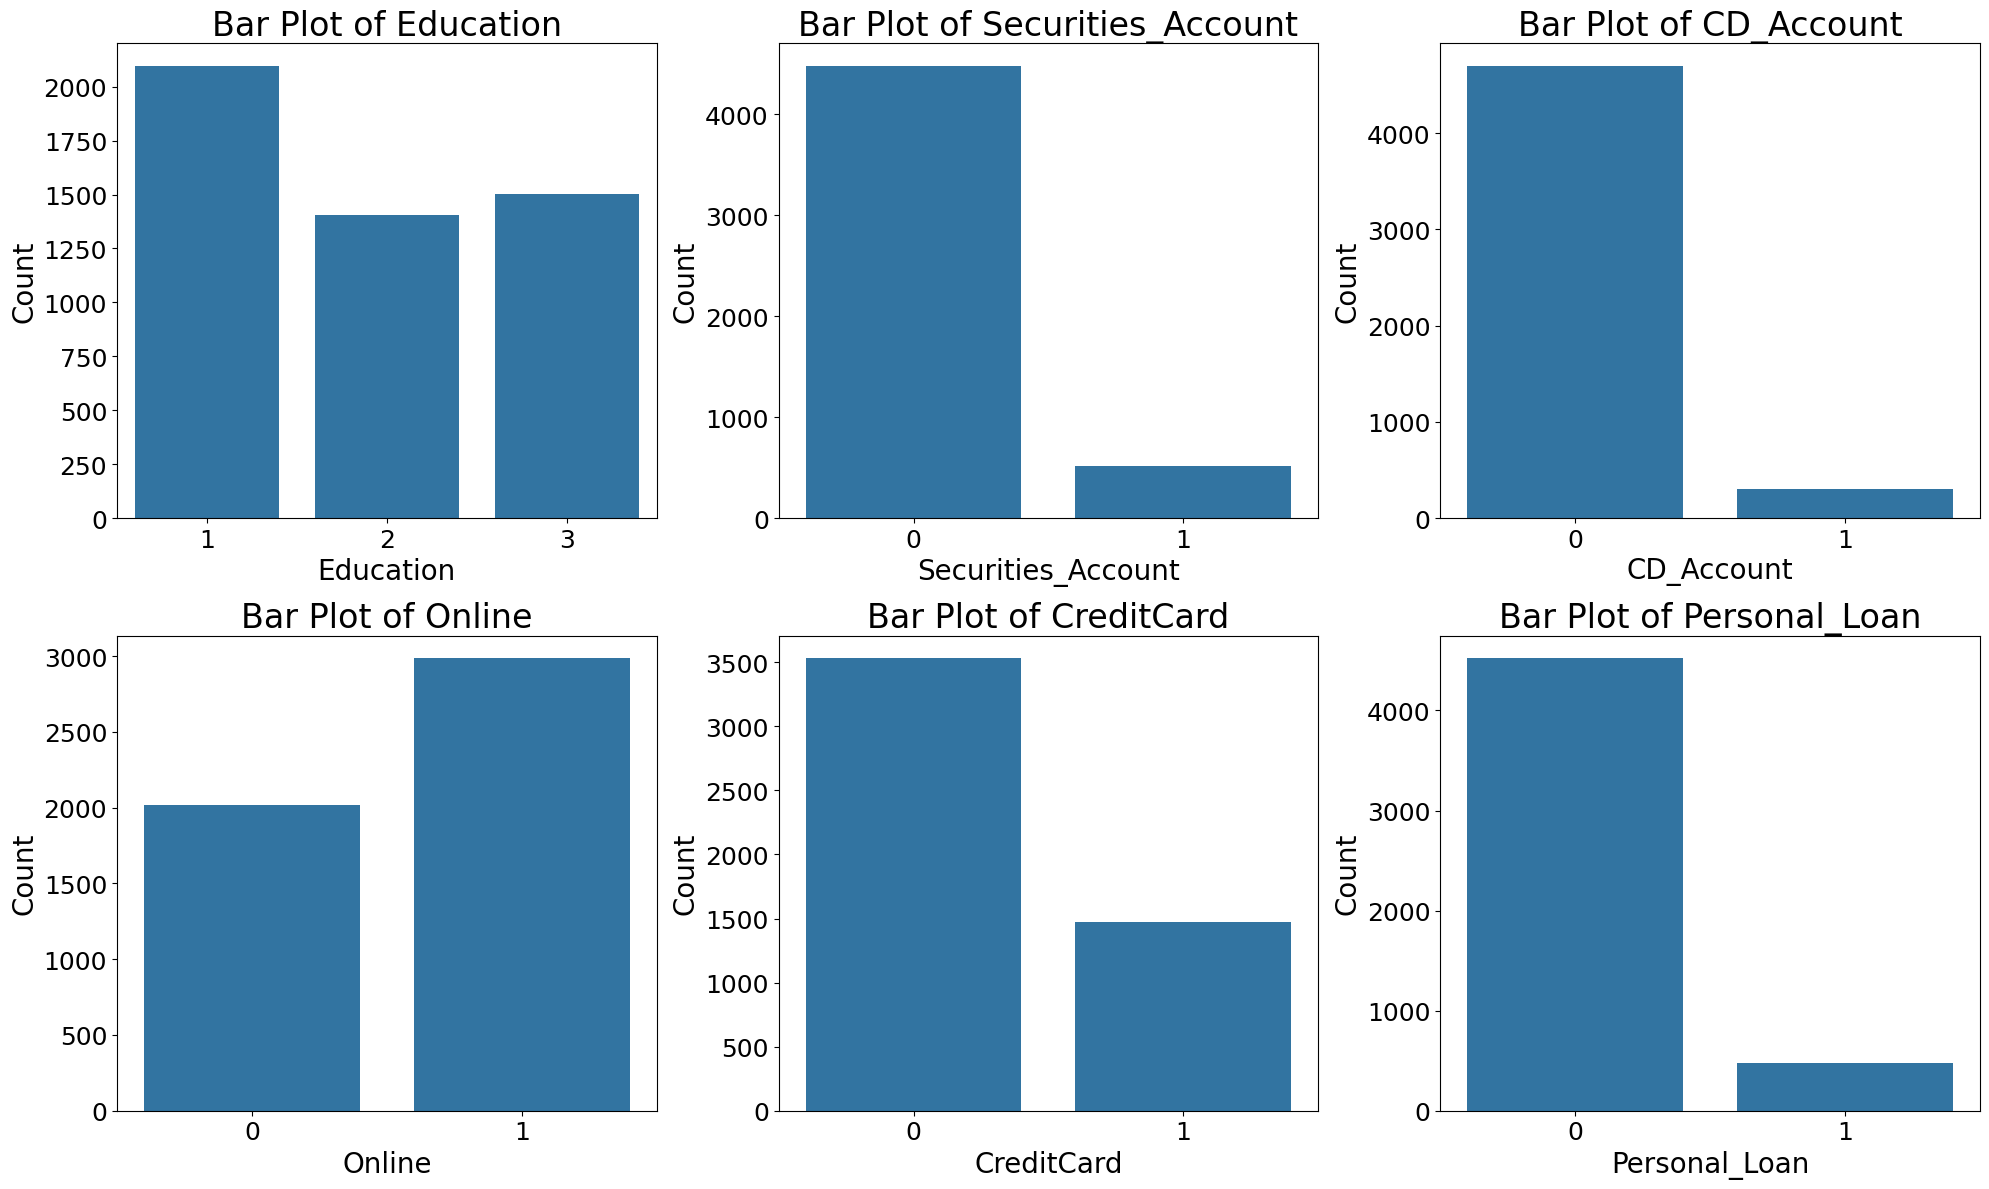

In [ ]:
# Categorical columns to plot
cat_cols = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']

# Figure and array of subplots
fig, subs = plt.subplots(2, 3, figsize=(20, 12))
subs = subs.flatten() # Flatten subplot array

# Create bar plot for each categorical field
for i, col_name in enumerate(cat_cols):
  sub = subs[i]
  value_counts = df[col_name].value_counts().sort_index()
  sns.barplot(x=value_counts.index, y=value_counts.values, ax=sub)
  sub.set_xlabel(col_name, fontsize=20)
  sub.set_ylabel('Count', fontsize=20)
  sub.tick_params(axis='x', labelsize=18)
  sub.tick_params(axis='y', labelsize=18)

  # Set subplot TITLE font size
  sub.set_title(f'Bar Plot of {col_name}', fontsize=24)

# Display all subplots
plt.tight_layout()
plt.show()

**Observations**
* A majority of customers use the online portal.
* A fair percentage of customers have a credit card outside of the client bank.
* The client bank isn't getting a high percentage of conversion in the securities, CD, or loan products.

### **4B. Bivariate Analysis**

**Creating a heat map for numeric variables**

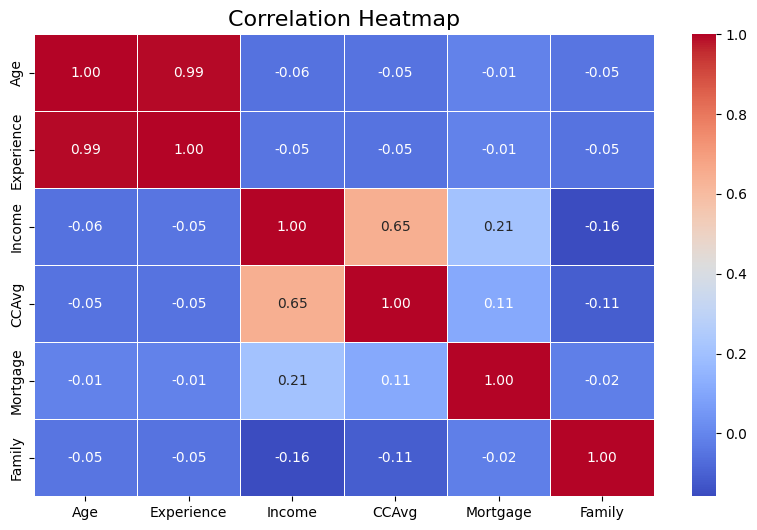

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)

# Display heatmap
plt.show()

**Observations**
* There's a high correlation between income and CCAvg.
* There's a moderate correlation between income and mortgage.
* Makes sense that there's a near perfect correlation between age and experience.


**Creating box plots to compare numeric columns against personal loan**

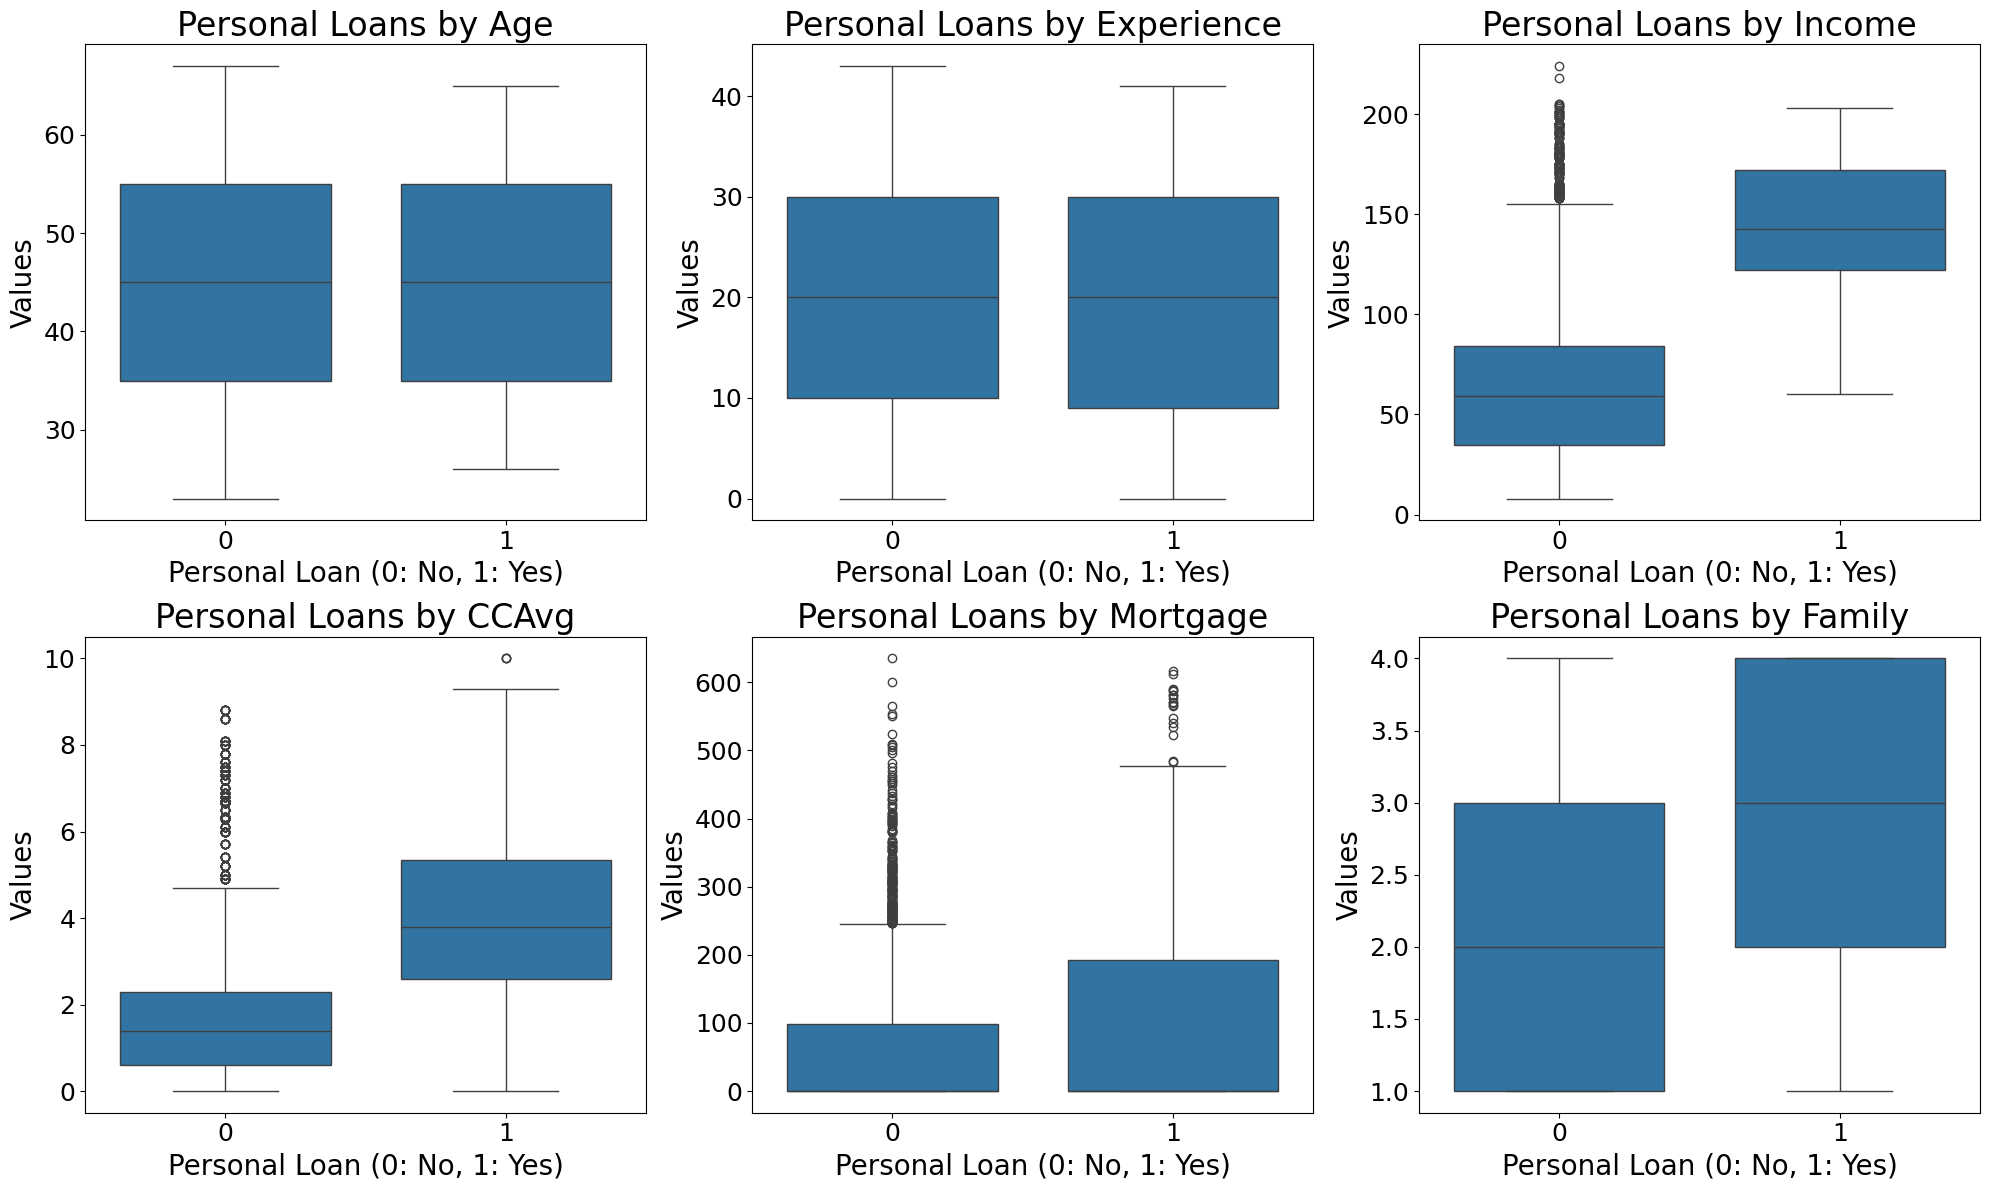

In [ ]:
# Figure and array of subplots
fig, subs = plt.subplots(2, 3, figsize=(20, 12))
subs = subs.flatten() # Flatten subplot array

# Create box plot for each numeric field
for i, col_name in enumerate(num_cols):
  sub = subs[i]
  sns.boxplot(x='Personal_Loan', y=col_name, data=df, ax=sub, width=0.75)
  sub.set_ylabel('Values', fontsize=20)
  sub.set_xlabel('Personal Loan (0: No, 1: Yes)', fontsize=20)
  sub.tick_params(axis='x', labelsize=18)
  sub.tick_params(axis='y', labelsize=18)
  sub.set_title(f'Personal Loans by {col_name}', fontsize=24)

# Display all subplots
plt.tight_layout()
plt.show()

**Observations**
* Age and experience don't seem to matter much regarding personal loans.
* Customers with a higher income have a higher likelihood of having a personal loan.
* Customers with a higher average credit card spend have a higher likelihood of having a personal loan.
* Larger families seem to indicate a higher likelihood of personal loans.
* There may be a slight correlation between mortgage and personal loans.

**Creating stacked bar charts to relate categorical variables to personal loan**

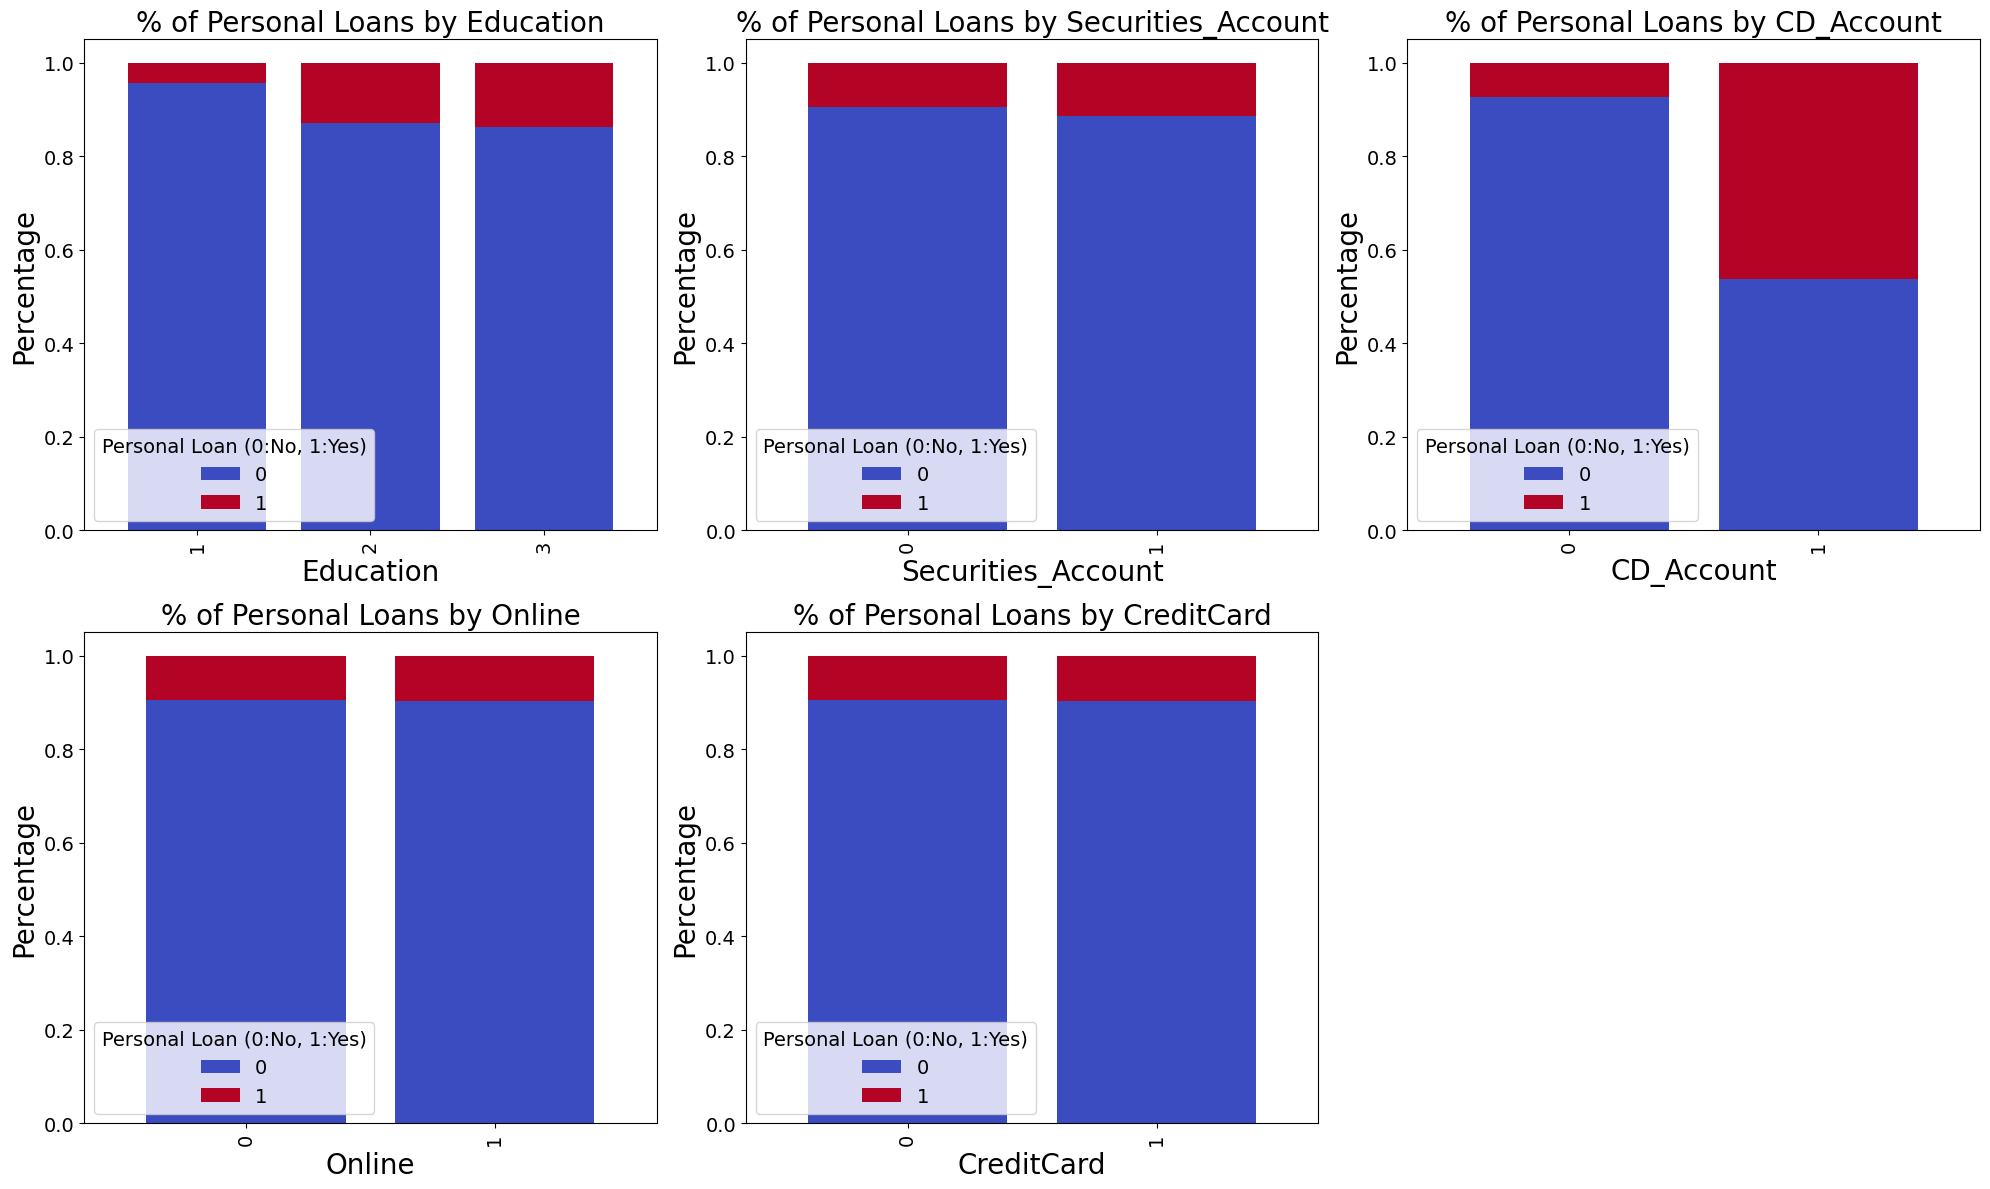

In [ ]:
# Figure and array of subplots
fig, subs = plt.subplots(2, 3, figsize=(20, 12))
subs = subs.flatten() # Flatten subplot array

for i, col_name in enumerate(cat_cols):
  sub = subs[i]

  # creating a crosstab
  tab = pd.crosstab(df[col_name], df['Personal_Loan'], normalize='index')

  # creating the bar plot
  tab.plot(kind='bar', stacked=True, ax=sub, colormap="coolwarm", width=0.8)
  sub.set_title(f'% of Personal Loans by {col_name}', fontsize=20)
  sub.set_xlabel(col_name, fontsize=20)
  sub.set_ylabel('Percentage', fontsize=20)
  sub.tick_params(axis='x', labelsize=14)
  sub.tick_params(axis='y', labelsize=14)
  sub.legend(title='Personal Loan (0:No, 1:Yes)', title_fontsize='14', fontsize='14', loc='lower left')

# Display all plots
fig.delaxes(subs[5])
plt.tight_layout()
plt.show()

**Observations**
* Outside credit card and online portal usage don't appear to predict personal loans.
* CD Account seems a good predictor of personal loans.
* Higher education and securities account might slightly predict personal loans.

## **5. Model Preparation**

### **5A. Model Selection & Criterion**

**Model Selection**
* Primary goal is to predict if a liability customer will buy a personal loan.
* Personal_Loan is the target/dependent variable, so we need a supervised model.
* This is a binary classification problem.
* Decision tree analysis seems to be an appropriate model for this problem.
* I will also run a logistics regression as an alternative model for comparison.

**Model Success Criterion**
* Goal is to maximize the likelihood of personal loan conversions. Target from previous campaign seems to be 9%.
* For marketing department, we need to identify the features of a customer that is most likely to apply for a personal loan.
* False positives (predict a customer will be interested in a loan when they actually won't) can lead to unnecessary marketing spend.
* False negatives (predict a customer won't be interested in a loan when they actually might be) can lead to missed loan opportunities.
* I don't see either as being uniquely critical to avoid, thus F1 seems to be the most appropriate measure for choosing the best model.

### **5B. Data Preparation**

**Defining predictor and target variables**

In [ ]:
x = df.drop(["Personal_Loan"], axis=1) # Predictor variables
y = df["Personal_Loan"] # Response variable

**Validating new data sets**

In [ ]:
x.head(1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0


In [ ]:
y.head(1)

,Personal_Loan
0,0


**Splitting data into training and test sets using 80/20 split**




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=25)

**Checking split statistics**

In [ ]:
print("Rows in train data =", x_train.shape[0])
print("Rows in test data =", x_test.shape[0], '\n')
print("% of classes in training set:")
print(100 * y_train.value_counts(normalize=True), '\n')
print("% of classes in test set:")
print(100 * y_test.value_counts(normalize=True))

Rows in train data = 4000
Rows in test data = 1000 

% of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

% of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


**Observations**
* I'm using a random_state value of 25.
* Despite randomization, percentages match with 9.4% having loans in both sets of data.

### **5C. Graph and Evaluation Functions**

**Function to display graphical decision tree**

In [ ]:
def show_dt(model, height):
  # list of feature names in X_train
  feature_names = list(x_train.columns)

  # set the figure size for the plot
  plt.figure(figsize=(20, height))

  # plotting the decision tree
  out = tree.plot_tree(
      model,                          # decision tree classifier model
      feature_names=feature_names,    # list of feature names (columns) in the dataset
      filled=True,                    # fill the nodes with colors based on class
      fontsize=14,                    # font size for the node text
      node_ids=False,                 # do not show the ID of each node
      class_names=None,               # whether or not to display class names
  )

  # add arrows to the decision tree splits if they are missing
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("black")    # set arrow color to black
          arrow.set_linewidth(1)          # set arrow linewidth to 1

  # displaying the plot
  plt.show()

**Function for performance metrics**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_perf(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

**Function for confusion matrix**

In [ ]:
def conf_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(4, 3))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

**Function to plot bar chart of feature importance**

In [ ]:
def feature_importance(model):
  importances = model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(10, 5))
  plt.title("Feature Importances")
  plt.barh(range(len(indices)), importances[indices], color="red", align="center")
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel("Relative Importance")
  plt.show()

## **6. Default Model**

### **6A. Build Default Model**

**Build default decision tree**

In [ ]:
# creating an instance of the decision tree model
dt1 = DecisionTreeClassifier(random_state=25)

# fitting the model to the training data
dt1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=25)

**Print graphical version of default decision tree**

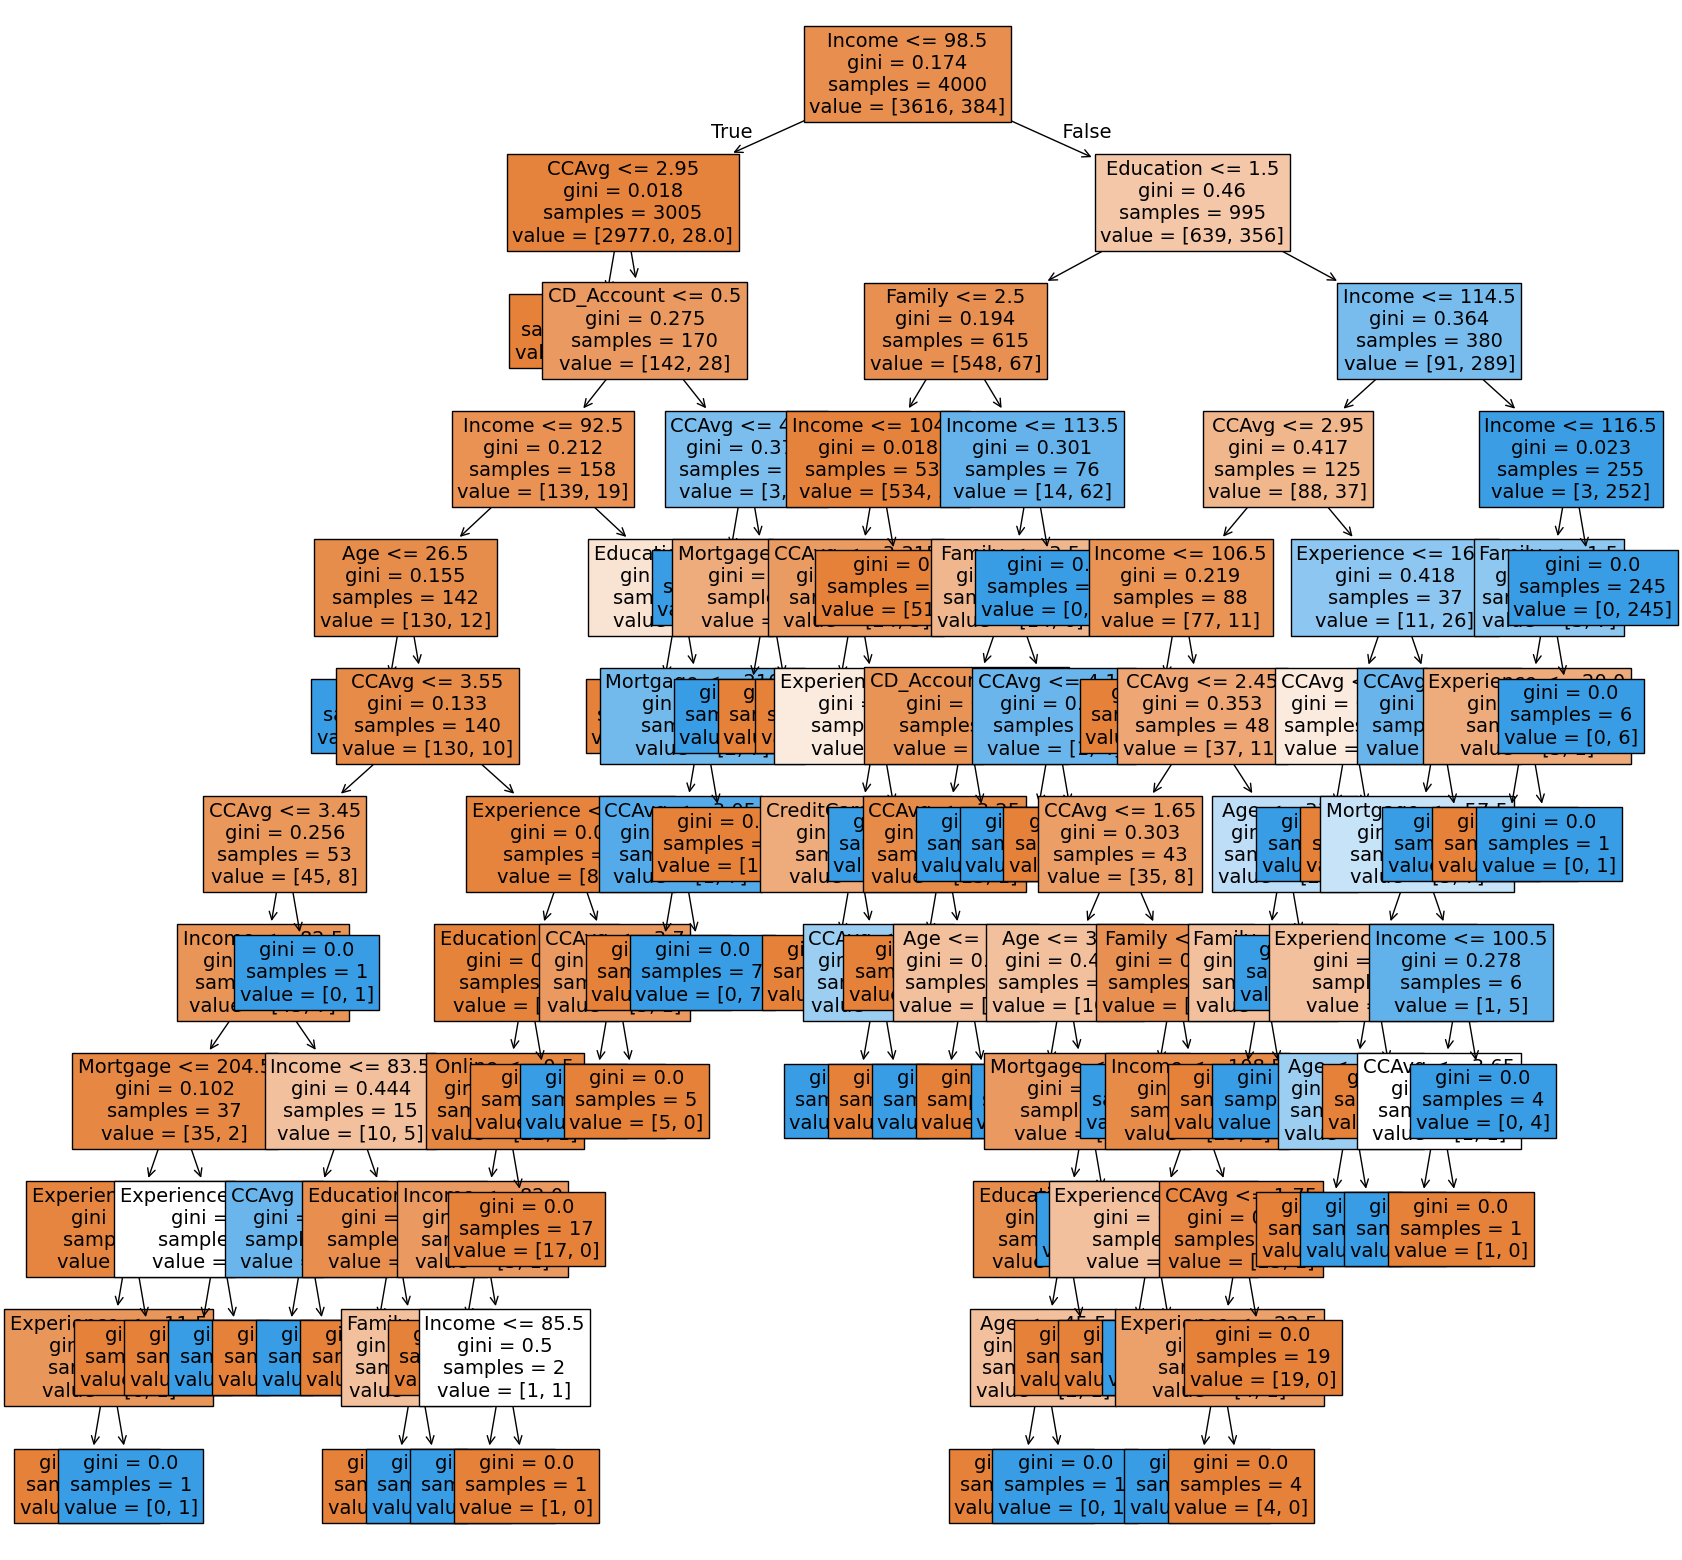

In [ ]:
show_dt(dt1, 20)

**Observations**
* This is a very complicated model, as expected from the default.
* Depth of the model is 11.

**Print text version of default decision tree**

In [ ]:
print(tree.export_text(dt1, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2835.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.45
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Mortgage <= 204.50
|   |   |   |   |   |   |   |   |   |--- Experience <= 13.00
|   |   |   |   |   |   |   |   |   |   |--- Experience <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Experience >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Experience >  13.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [28.00, 0.00] class: 0
|   |   |   |   |   |

**Observations**
* Depth suggests a high likelihood of the model overfitting the training data.
* Customers with an income greater than $114,500 and an education level beyond undergraduate are more likely to take a personal loan.

### **6B. Evaluate Default Model**

**Plot default model training data confusion matrix**

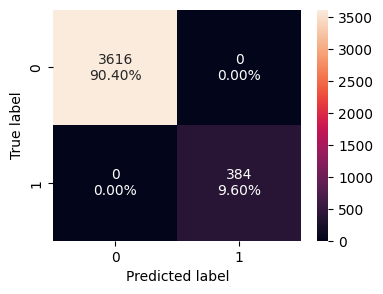

In [ ]:
conf_matrix(dt1, x_train, y_train)

**Observations**
* The model demonstrates perfect classification performance on the training dataset.
* Again, there is a high likelihood of overfitting.

**Print default model training data performance metrics**

In [ ]:
dt1_train_perf = model_perf(dt1, x_train, y_train)
dt1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations**
* As expected from confusion matrix, all values are 1.

**Plot default model test data confusion matrix**

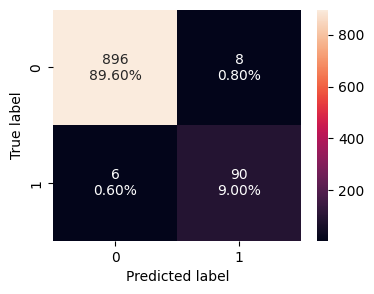

In [ ]:
conf_matrix(dt1, x_test, y_test)

**Observations**
* The model shows excellent generalization.

**Print default model test data performance metrics**

In [ ]:
dt1_test_perf = model_perf(dt1, x_test, y_test)
dt1_test_perf

,Accuracy,Recall,Precision,F1
0,0.986,0.9375,0.918367,0.927835


**Observations**
* All scores are high.
* F1 score will be primary driver, which is ~92.8%.

**Evaluate relative importance of predictor variables for default model**

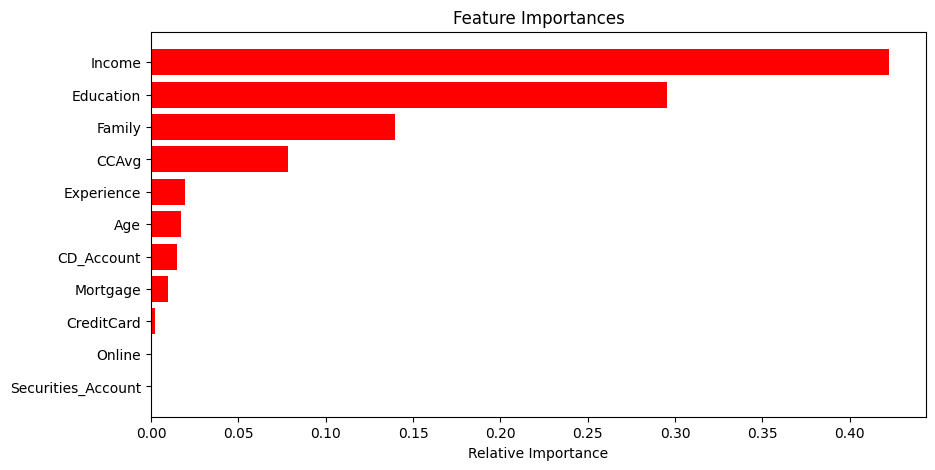

In [ ]:
feature_importance(dt1)

**Observations**
* This model relies mostly on 8 of 10 of the predictor variables.
* Income, education, family size, and ccavg have the highest relative importance.

## **7. Pre-Pruning Model**

### **7A. Build Pre-Pruned Model**

**Build pre-pruned decision tree**

In [ ]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 13, 1)
max_leaf_nodes_values = np.arange(10, 101, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=25
            )

            # fit the model to the training data
            estimator.fit(x_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(x_train)
            y_test_pred = estimator.predict(x_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator
                best_test_score = test_f1_score

# creating an instance of the best model
dt2 = best_estimator

# fitting the best model to the training data
dt2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(6), max_leaf_nodes=np.int64(20),
                       min_samples_split=np.int64(20), random_state=25)

**Print pre-pruned model best parameters** *italicized text*

In [ ]:
# Print the best parameters
print("Best parameters found:", '\n')
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test F1 score: {best_test_score}")

Best parameters found: 

Max depth: 6
Max leaf nodes: 20
Min samples split: 20
Best test F1 score: 0.9312169312169312


**Print graphical version of pre-pruned decision tree**

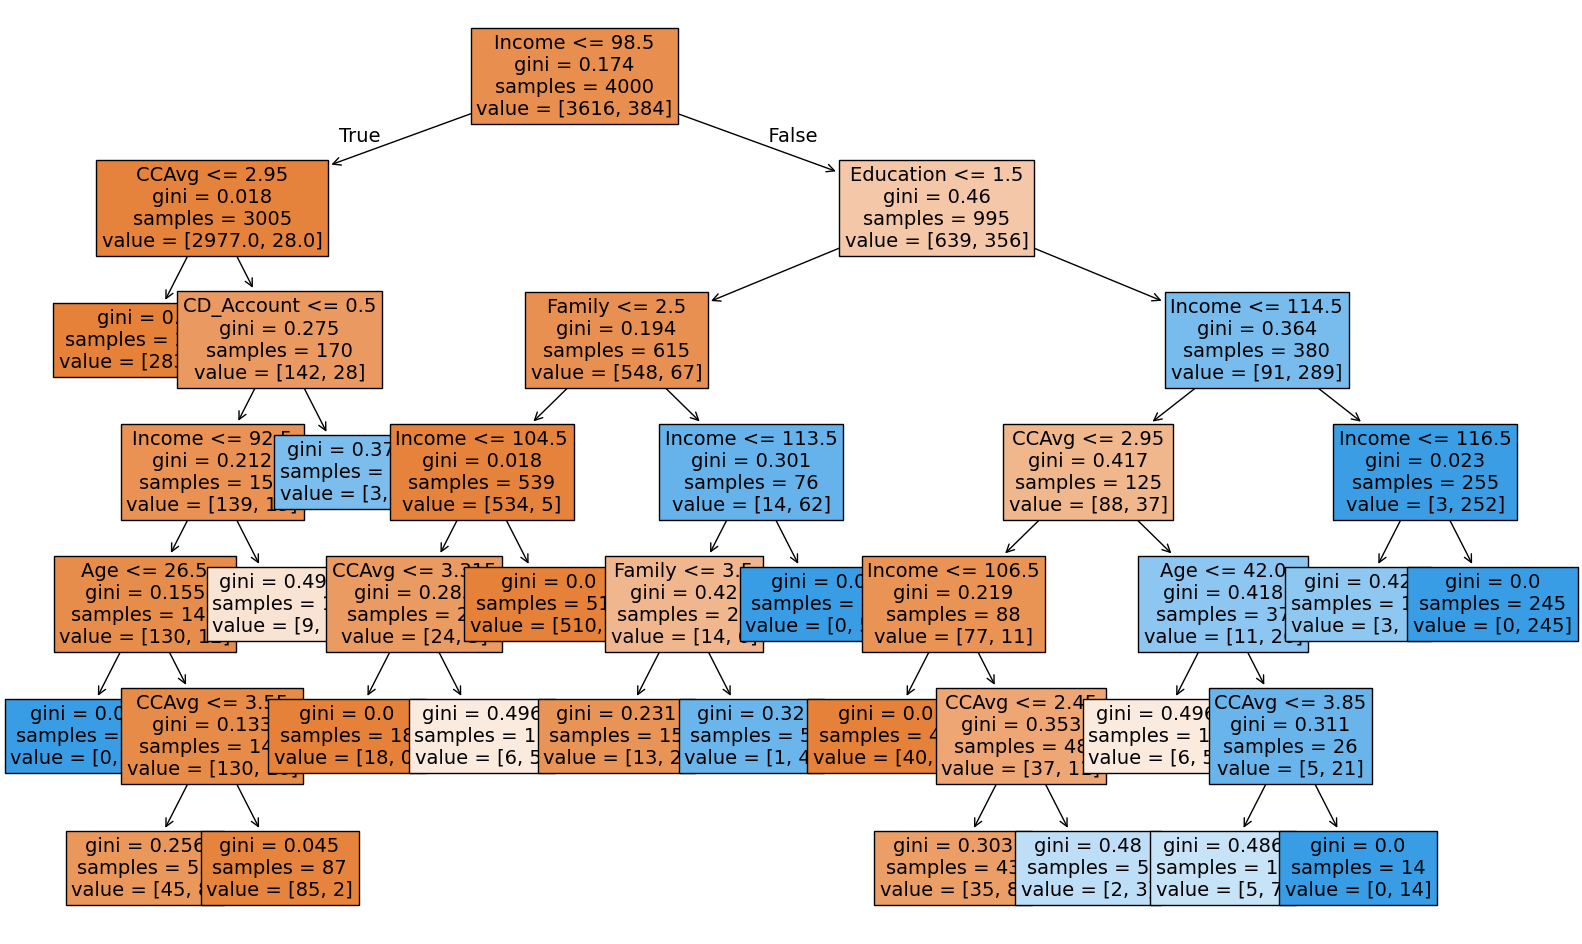

In [ ]:
show_dt(dt2, 12)

**Observations**
* This is a much simpler model than the default.
* Depth of this model is at 6.

**Print text version of pre-pruned decision tree**

In [ ]:
print(tree.export_text(dt2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2835.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [45.00, 8.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [85.00, 2.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- weights: [9.00, 7.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [18.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |--- weights: [6.00, 5.00] class: 0
|   |   |   |--- Income >  104.50
|   |

**Observations**
* Pre-pruned model shows a strong reduction in depth and complexity.
* There are several impure nodes. For instance, one node shows all no's for personal loans but contains 8 yesses.

### **7B. Evaluate Pre-Pruned Model**

**Plot pre-pruned model training data confusion matrix**

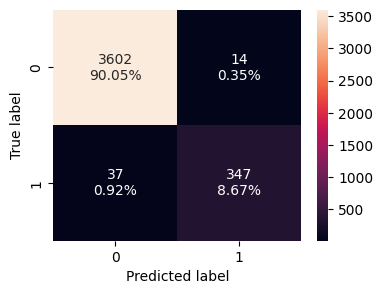

In [ ]:
conf_matrix(dt2, x_train, y_train)

**Observations**
* 14 False Positives and 37 False Negatives

**Print pre-pruned model training data performance metrics**

In [ ]:
dt2_train_perf = model_perf(dt2, x_train, y_train)
dt2_train_perf

,Accuracy,Recall,Precision,F1
0,0.98725,0.903646,0.961219,0.931544


**Observations**
* This model appears to perform well, though classifications aren't perfect, as expected in a pre-pruned tree.

**Plot pre-pruned model test data confusion matrix**

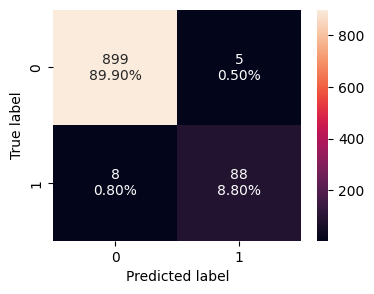

In [ ]:
conf_matrix(dt2, x_test, y_test)

**Observations**
* 5 False Positives and 8 False Negatives

**Print pre-pruned model test data performance metrics**

In [ ]:
dt2_test_perf = model_perf(dt2, x_test, y_test)
dt2_test_perf

,Accuracy,Recall,Precision,F1
0,0.987,0.916667,0.946237,0.931217


**Observations**
* All scores are high, showing this model still generalizes well.
* F1 score is ~93.1%.

**Evaluate relative importance of predictor variables for pre-pruned model**

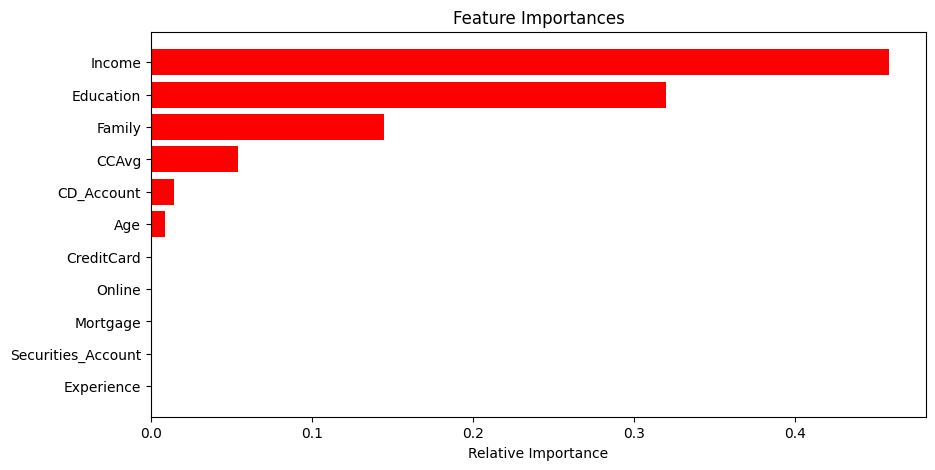

In [ ]:
feature_importance(dt2)

**Observations**
* Income, education, family size, and ccavg remain with the highest relative importance.
* Experience, mortgage, and credit card have been dropped from this tree.

## **8. Post-Pruned Model**

### **8A. Build Post-Pruned Model**

**Build data set of effective alphas compared to total impuirities**

In [ ]:
clf = DecisionTreeClassifier(random_state=25)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000123,0.000494
2,0.000208,0.000910
3,0.000225,0.001360
4,0.000227,0.001815
5,0.000231,0.002741
6,0.000232,0.003205
7,0.000236,0.004151
8,0.000242,0.004634
9,0.000300,0.005234


**Plot effective alphas vs total impurities**

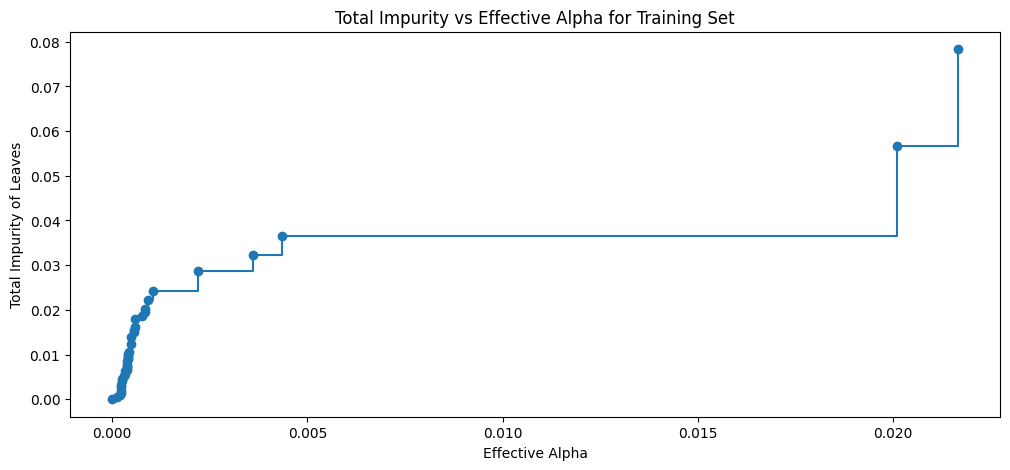

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

**Train decision tree using the effective alphas**

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=25, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04762204768938087


**Plot # of nodes vs alpha and depth vs alpha**

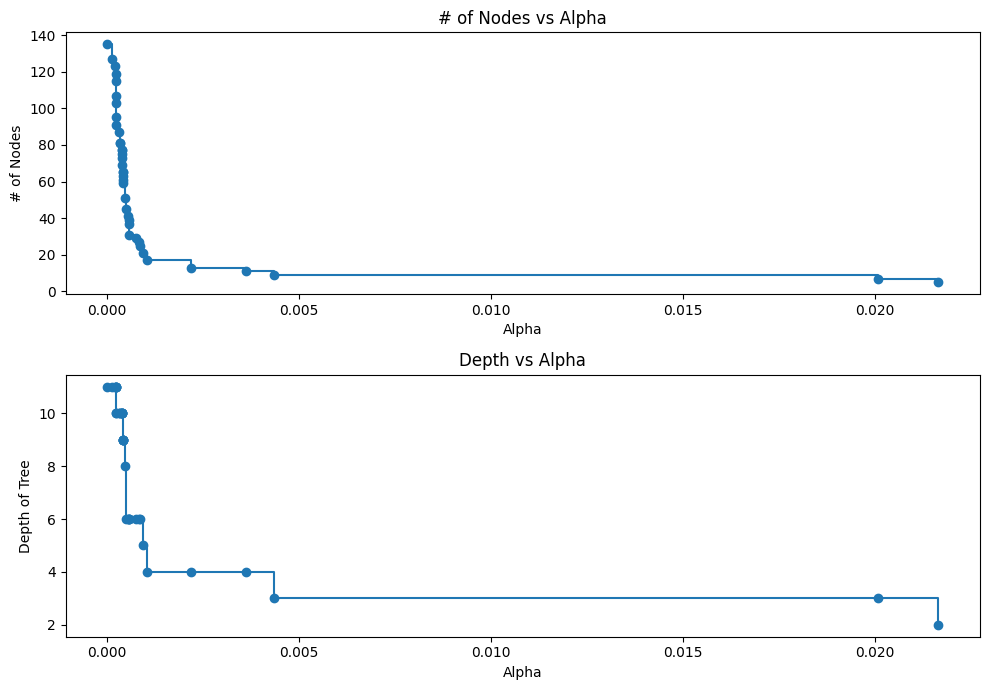

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("# of Nodes")
ax[0].set_title("# of Nodes vs Alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

**F1 score vs alpha for training data**

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(x_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

**F1 score vs alpha for test data**

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(x_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

**Plot F1 score vs alpha for test and training data**

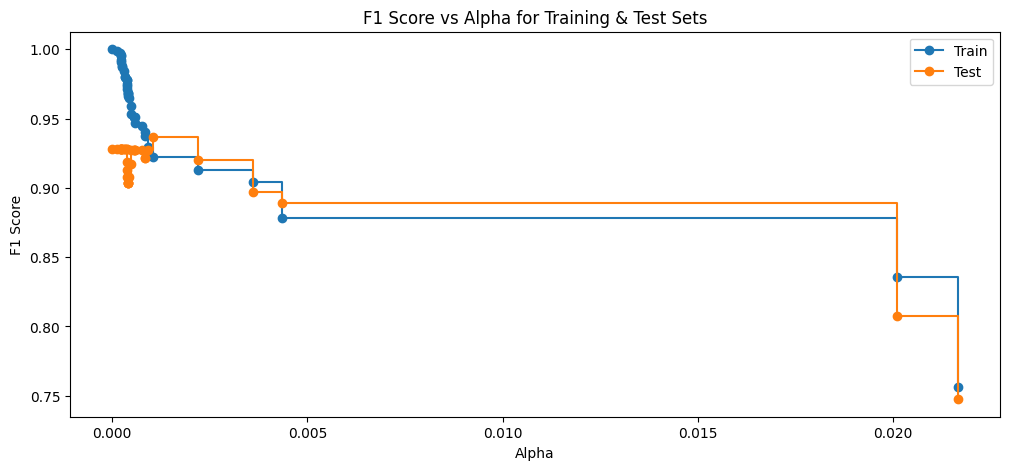

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for Training & Test Sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="Train", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="Test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

**Building model with highest F1 score**

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dt3 = clfs[index_best_model]
print(dt3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0010434297062261034),
                       random_state=25)


**Print graphical version of post-pruned decision tree**

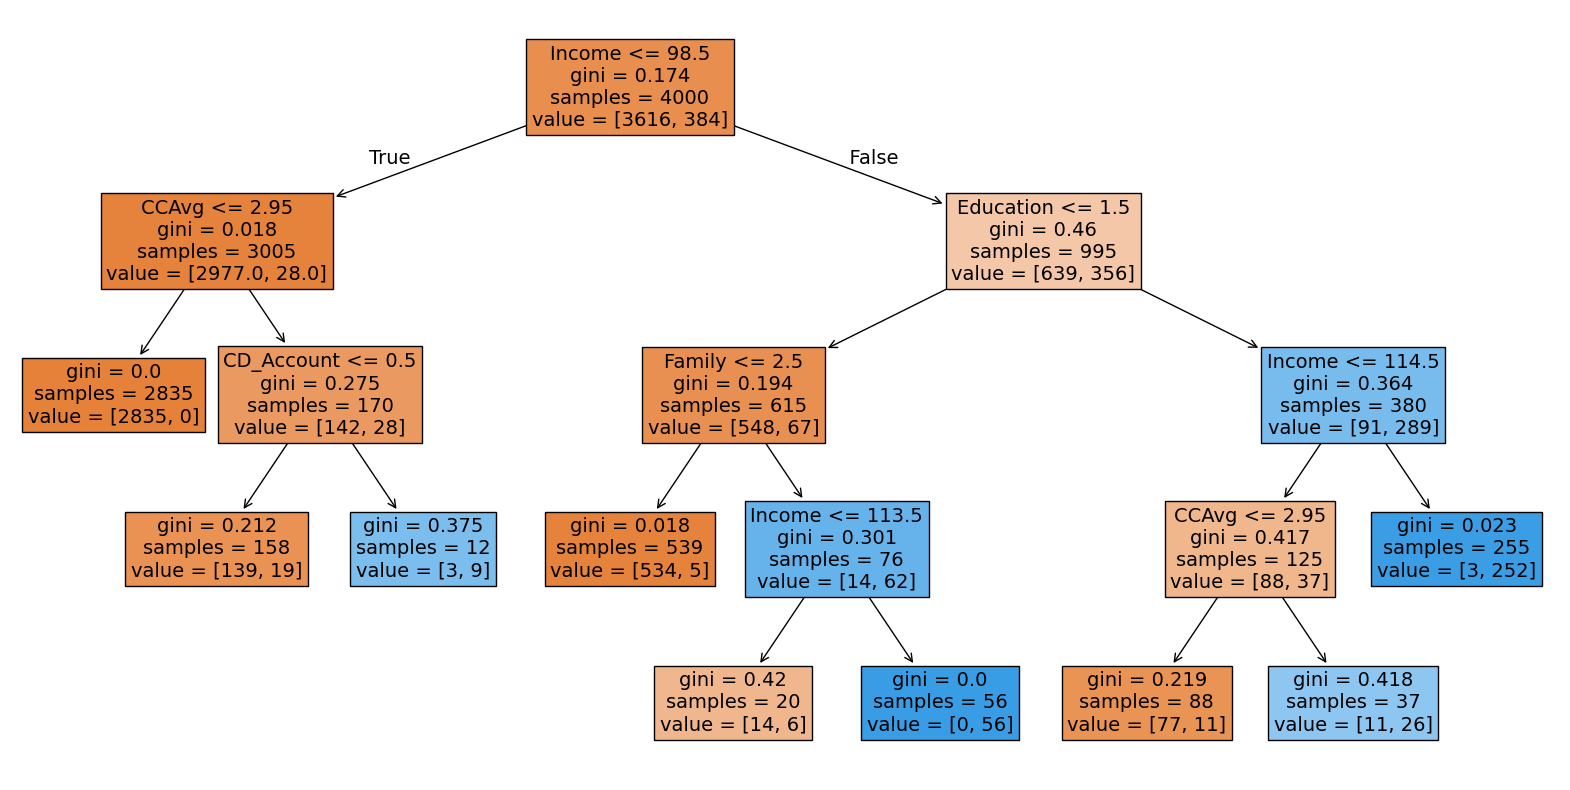

In [ ]:
show_dt(dt3, 10)

**Observations**
* This is the simplest of the 3 models so far.
* Depth is 4.

**Print text version of post-pruned decision tree**

In [ ]:
print(tree.export_text(dt3, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2835.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [139.00, 19.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [534.00, 5.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [14.00, 6.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 56.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [77.00, 11.00] class: 0
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [11.00, 26.00] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [3.00, 252.00] class: 1



**Observations**
* Customers with an income > $114,500 and an education level beyond undergraduate still shows the highest number of personal loans (252).
* This indicates the model still captures the most impactful splits.

### **8B. Evaluate Post-Pruned Model**

**Plot post-pruned model training data confusion matrix**

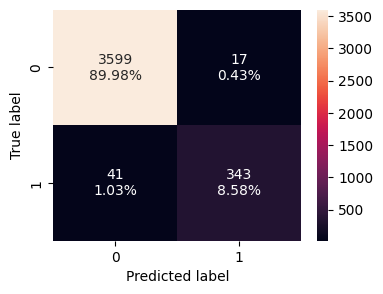

In [ ]:
conf_matrix(dt3, x_train, y_train)

**Observations**
* 17 False Positives and 41 False Negatives

**Print post-pruned model training data performance metrics**

In [ ]:
dt3_train_perf = model_perf(dt3, x_train, y_train)
dt3_train_perf

,Accuracy,Recall,Precision,F1
0,0.9855,0.893229,0.952778,0.922043


**Observations**
* This model shows a slight drop in performance on training data compared to previous models.

**Plot post-pruned model test data confusion matrix**

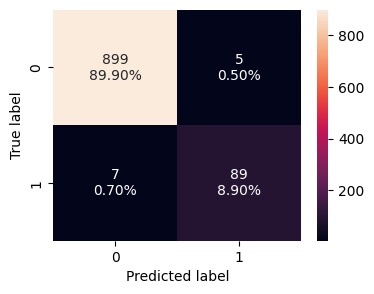

In [ ]:
conf_matrix(dt3, x_test, y_test)

**Observations**
* 5 False Positives and 7 False Negatives

**Print post-pruned model test data performance metrics**

In [ ]:
dt3_test_perf = model_perf(dt3, x_test, y_test)
dt3_test_perf

,Accuracy,Recall,Precision,F1
0,0.988,0.927083,0.946809,0.936842


**Observations**
* All scores remain high, with F1 even increasing on test data.
* F1 score is ~93.7%.

**Evaluate relative importance of predictor variables for post-pruned model**

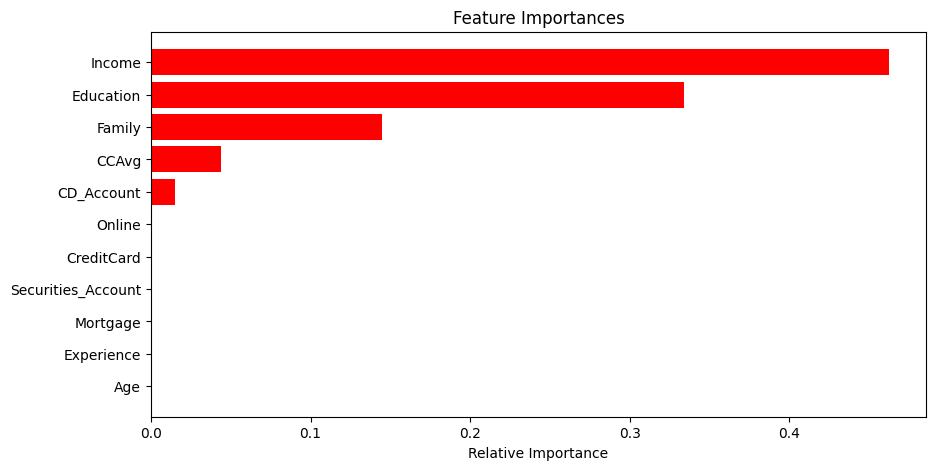

In [ ]:
feature_importance(dt3)

**Observations**
* The only additional feature dropped from this model appears to be age.

## **9. Logistics Regression**

### **9A. Build Logistics Regression Model**

**Run logistics regression to find coefficients and intercept**

In [ ]:
# Fit the model on training data
lr1 = LogisticRegression(solver="liblinear", random_state=1)
lr1.fit(x_train, y_train)

# Predict on test
y_predict = model.predict(x_test)

# Calculate coefficients and intercept
coef_df = pd.DataFrame(model.coef_, columns=x_train.columns)
coef_df['Intercept'] = model.intercept_
print("Coefficients and Intercept:")
print(coef_df)

Coefficients and Intercept:
        Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0 -0.375805     0.38187  0.049234  0.583726  0.113873    1.64349  0.000591   

   Securities_Account  CD_Account    Online  CreditCard  Intercept  
0           -0.650096    3.022322 -0.614481   -0.829869   -2.86267  


**Observations**
* The higher the absolute value of the coefficient, the stronger the relationship to likelihood of taking a loan.
* Education, CD account, and family still show a strong relationship to personal loan.
* Income and ccavg show relatively low strength compared to decision tree models.
* Surprisingly, securities account, online, age, and credit card show relatively high negative coefficients.

### **9B. Evaulate Logistics Regression Model**

**Plot logistics regression model train data confusion matrix**

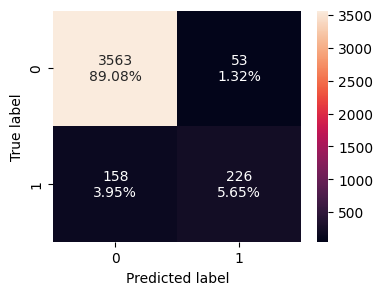

In [ ]:
conf_matrix(lr1, x_train, y_train)

**Observations**
* 53 False Positives and 158 False Negatives

**Print logistics regression model train data performance metrics**

In [ ]:
lr1_train_perf = model_perf(lr1, x_train, y_train)
lr1_train_perf

,Accuracy,Recall,Precision,F1
0,0.94725,0.588542,0.810036,0.68175


**Observations**
* Though accuracy and precision are high, recall and F1 are low compared to decision tree models.

**Plot logistics regression model test data confusion matrix**

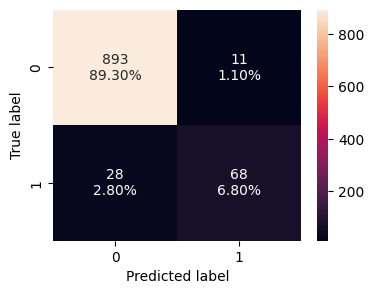

In [ ]:
conf_matrix(lr1, x_test, y_test)

**Observations**
* 11 False Positives and 28 False Negatives

**Print logistics regression model test data performance metrics**

In [ ]:
lr1_test_perf = model_perf(lr1, x_test, y_test)
lr1_test_perf

,Accuracy,Recall,Precision,F1
0,0.96,0.697917,0.858974,0.770115


**Observations**
* F1 score is ~77%.

**Evaluate relative importance of predictor variables for logistics regression model**

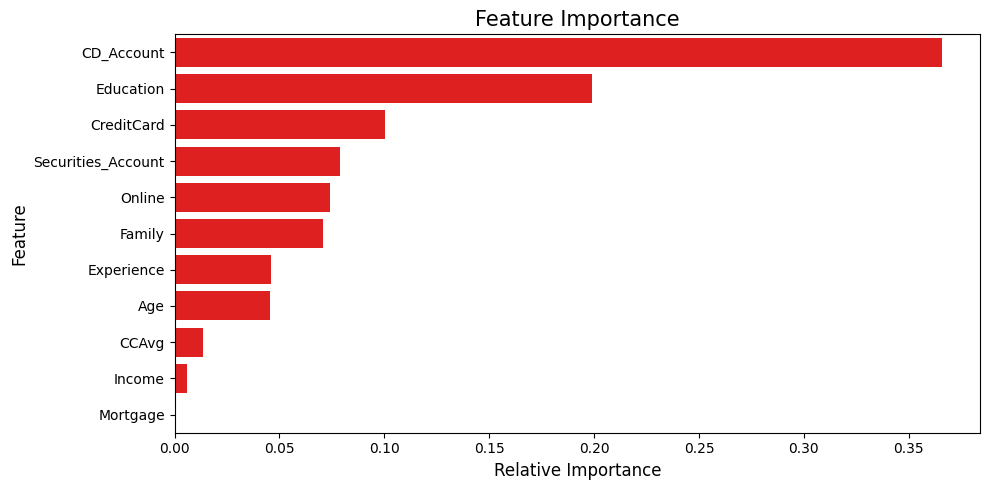

In [ ]:
# Get coefficients without intercept
feature_coefficients = coef_df.drop(columns=['Intercept']).iloc[0]

# Calculate absolute values
abs_coefficients = feature_coefficients.abs()

# Calculate relative importance
total_abs_importance = abs_coefficients.sum()
rel_importance = abs_coefficients / total_abs_importance

# Sort in descending order
sorted_importance = rel_importance.sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=sorted_importance.values, y=sorted_importance.index, color="red")
plt.xlabel("Relative Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

**Observations**
* Whereas cd account is the most important here, it's only the 5th most important in the decision trees.
* Whereas income showed the highest importance for all three decision trees, it's the second lowest in this model.

## **10. Model Performance Comparison and Final Model Selection**

### **10A. Model Performance Comparison**

**Train models performance comparison**

In [ ]:
models_train_comp_df = pd.concat(
    [
        dt1_train_perf.T,
        dt2_train_perf.T,
        dt3_train_perf.T,
        lr1_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistics Regression",
]
print("Train Data Performance Comparison:", "\n")
models_train_comp_df

Train Data Performance Comparison: 



,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Logistics Regression
Accuracy,1.0,0.987250,0.985500,0.947250
Recall,1.0,0.903646,0.893229,0.580729
Precision,1.0,0.961219,0.952778,0.816850
F1,1.0,0.931544,0.922043,0.678843


**Test models performance comparison**

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt1_test_perf.T,
        dt2_test_perf.T,
        dt3_test_perf.T,
        lr1_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
    "Logistics Regression",
]
print("Test Data Performance Comparison:", "\n")
models_test_comp_df

Test Data Performance Comparison: 



,Decision Tree (Default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning),Logistics Regression
Accuracy,0.986000,0.987000,0.988000,0.960000
Recall,0.937500,0.916667,0.927083,0.697917
Precision,0.918367,0.946237,0.946809,0.858974
F1,0.927835,0.931217,0.936842,0.770115


### **10B. Final Model Selection**

**Observations**
* Since F1-score is the primary driver here, the logistics regression is clearly eliminated.
* The default model generalizes well, though it's overcomplicated.
* Both the pre-pruned and post-pruned models generalize well with comparable F1-scores, with the key difference between the two being inclusion of age.
* Since age is of the lowest relative importance in the pre-pruned model, I'm choosing the post-pruned model for simplicity.

## **11. Actionable Insights and Business Recommendations**


* Target high-income, highly educated customers with premium personal loan offers, appealing to financial standing.
* Also focus on high-income earners with larger families, regardless of education level, appealing to family-related expenses.
* Upsell CD account holders to personal loans with customized personal loan offers.
* Engage customers with moderate to high income and high credit card spending with targeted personal loan offers as an alternative.

## Exporting to HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Exporting to HTML
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Burns Greg June Hackathon Project.ipynb"

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Burns Greg Personal Loan Project.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 3394864 bytes to /content/drive/MyDrive/Colab Notebooks/Burns Greg Personal Loan Project.html


___